# Clustering

Author: Dr. Vijesh J. Bhute
<br><br>
<b>Highlights:</b>
<ul><li>Code to identify clusters (e.g., customer segmentation) using k-means clustering and hierarchical clustering</li>
<li>Defined functions for visualising clusters and plotting within cluster sum of squares (for k-means) to make it easier to compare models.</li></ul>

Lessons are modified from 'Machine Learning A-Z - Hands on Python and R in Data Science' and improved for automation and with more theory. 

### Background
Regression is used to predict continuous output (e.g., height of an individual, price of a commodity, etc.). Classification is used to predict the categorical output (e.g., control vs. cancer, grade in exams, etc.). Clustering is similar to classification where you divide data into groups/clusters. But this is done in an unbiased manner to find unknown clusters. We will look at two different clustering algorithms:
<ul><li> k-means clustering 
    <ul><li>Need to choose the number of clusters, WCSS (within cluster sum of squares) can be used to assess the quality of clusters based on the choice of $k$</li>
        <li> The WCSS improves with higher k. But the improvement with increase in k can be slower. This information can be used to decide the number of clusters. This is called <i>Elbow method</i></li></ul></li>
    <li> Hierarchical clustering </li></ul>

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import dataset

In [2]:
dataset = pd.read_csv('data/Mall_customers_clustering.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We are interested to cluster customers based on different parameters including gender, age, income, and spending score. 

For simplicity and ease of visualisation, we will start by using income and spending score as two parameters as it is easy to visualise with 2 features. 

We will also build a full model at the end of this notebook. 

### Independent variables

In [22]:
X_2 = dataset.iloc[:,[3,4]]

Since, the two columns are of similar order, it may not be necessary to perform feature scaling at this point. 

### Elbow method for selection of k

In [6]:
from sklearn.cluster import KMeans
def findK(X_parameters):
    wcss = [] #Within Cluster Sum of Squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X_parameters)
        wcss.append(kmeans.inertia_) #This evaluates the mean squared distance of points from centroid for each cluster
    plt.figure(figsize = (6, 4))
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    return wcss

C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


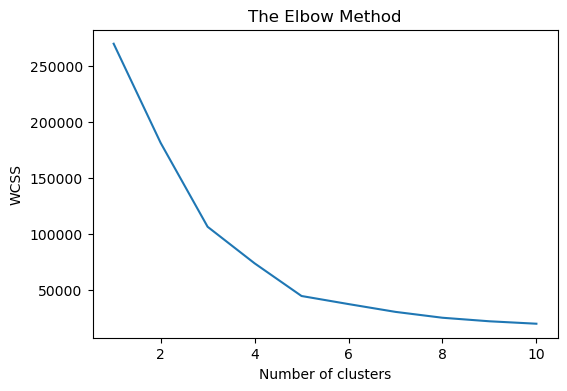

In [23]:
wcss_2 = findK(X_2)

From the above curve, it can be seen that $k=5$ is a good choice of clusters. Let's build the model with $k = 5$

In [24]:
k=5
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
kmeans.fit(X_2)
y_kmeans = kmeans.predict(X_2)

In [25]:
dataset['Category (0-4) using Income and SS'] = y_kmeans
dataset.head(10)
#dataset.columns[1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category (0-3) using all parameters,Category (0-4) using Income and SS
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,0,2
5,6,Female,22,17,76,4,3
6,7,Female,35,18,6,0,2
7,8,Female,23,18,94,4,3
8,9,Male,64,19,3,0,2
9,10,Female,30,19,72,4,3


### Visualising the clusters

In [68]:
def plotClusters(X_parameters, y_predict, model, k, index1, index2):
    plt.figure(figsize = (6,4))
    X = X_parameters.to_numpy()
    for i in range(0,k):
        plt.scatter(X[y_predict == i,index1], X[y_predict == i, index2], label = 'Cluster {}'.format(i))

    #Let's also plot cluster centroids. It is easy to do this for 2 dimensions
    #plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=150, c = 'yellow', label = 'Centroids',
    #       edgecolors = 'black')
    plt.legend(loc = 'best')
    plt.title('Clusters of customers')
    plt.xlabel(X_parameters.columns[index1])
    plt.ylabel(X_parameters.columns[index2])
    #return y_kmeans

## Full model with all relevant features

<ul><li>Note that clustering uses distances and it may not be suitable to include categorical/discreet variables as the distance doesn't make sense for them. For most clustering algorithms, therefore, it is better to exclude the categorical variables. </li>
    <li>It is also important to ensure parameters are scaled appropriately before analysis. </li></ul>

In [75]:
X_full = dataset.iloc[:,2:5]
X_full.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


The three columns are all in 0-100 range and therefore feature scaling is not needed. Below is the code in case you do want to perform feature scaling. 

### Feature scaling

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_X_scaled = sc.fit_transform(X_full) 
##This does the autoscaling (subtract by mean and divide by std)
##test set. So we need to just transform and not fit the test set
features_X = sc.inverse_transform(features_X_scaled) #numpy array of unscaled data

### Finding k

C:\Users\vbhute\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


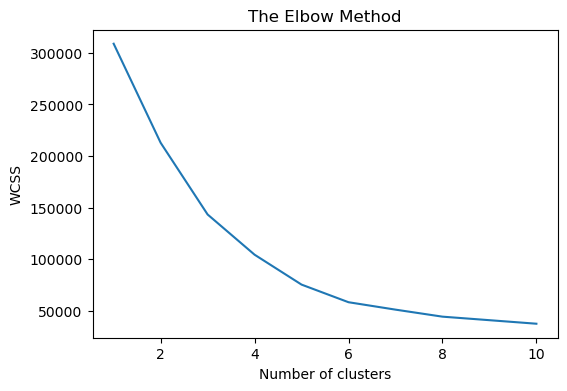

In [83]:
wcss_Full = findK(X_full)

6 seems like a good choice, but for comparison, I am going to keep k as 5. 

In [28]:
k_full = 5
kmeans_full = KMeans(n_clusters = k_full, init = 'k-means++', random_state = 42)
kmeans_full.fit(features_X)
y_kmeans_full = kmeans_full.predict(features_X)
dataset['Category (0-4) using all parameters'] = y_kmeans_full
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category (0-4) using Income and SS,Category (0-4) using all parameters
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,2,0


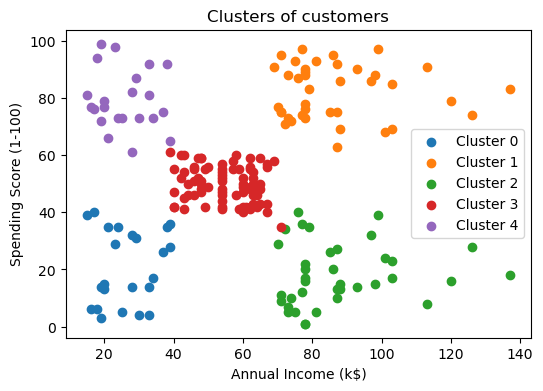

In [44]:
plotClusters(X_input, y_kmeans_full, kmeans_full, k_full, 3,4)

Note that the clusters are most distinct for annual income and spending score. These parameters are therefore sufficient to segment the customer base. Below is the visualisation of clusters using just these two parameters. Note that the results are almost identical. (You will not get similar results if you compare scaled and non-scaled dataset

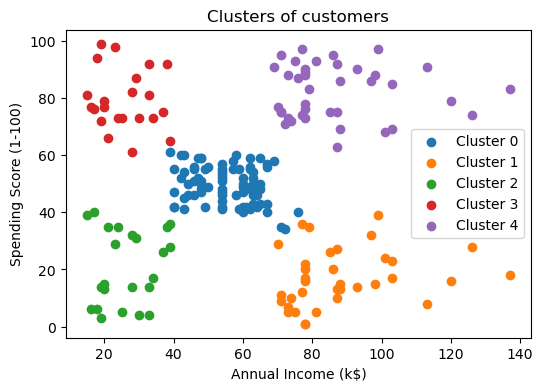

In [45]:
y_predict = kmeans.predict(X_2)
plotClusters(X_2, y_predict, kmeans, k, 0, 1)

## Hierarchical clustering

This uses distances between data points to draw connections and a threshold can be set to determine the number of clusters. As seen above, just last two features (income and spending score) are sufficient to segment the customers, we will continue to use these for our analysis. 

#### Finding number of clusters using Dendrogram

Dendrogram is plotted using <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html" target="_blank">scipy library</a>

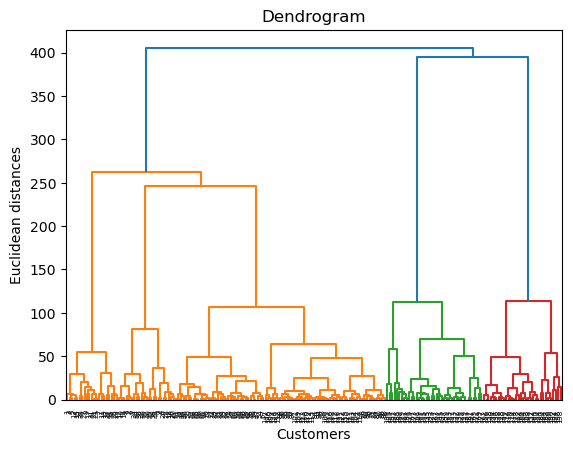

In [48]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_2, method = 'ward')) 
#Ward clustering: method of minimum variance, within cluster variance is low
#Other methods are 'single', 'average', 'complete', 'weighted', 'centroid', 'median', and 'ward'
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.savefig('data/images/Dendrogram.png', format='png', dpi=1200) #svg and eps (for LaTeX) are recommended

3 clusters should be fine but as can be seen, 5 clusters might also be a good choice. To be consistent with out analysis, we will use 5 clusters to build the Hierarchical clustering model.

#### Hierarchical Clustering

Lets build a model with desired number of clusters.

In [70]:
k_hc = 5

In [71]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k_hc, affinity = 'euclidean', linkage = 'ward')
#hc.fit(X_2)
y_hc = hc.fit_predict(X_2)
dataset['HC (0-4) using income and spending'] = y_hc

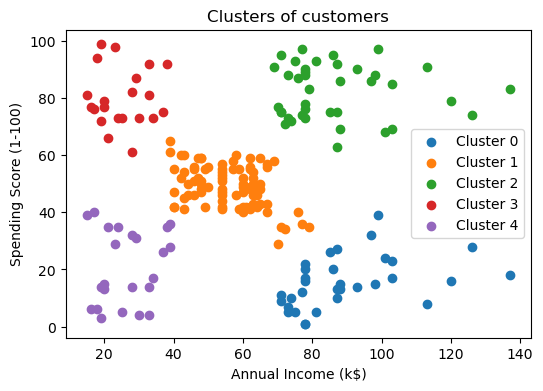

In [72]:
plotClusters(X_2, y_hc, hc, k_hc, 0, 1)

This is similar to the kMeans clusters with few points slightly different. You can play around with the number of clusters. 